In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import xarray as xr
pylab.rcParams['figure.figsize'] = (16., 9.)
#%matplotlib inline

In [27]:
ice = xr.open_dataset('/home/ck/DIR/mymachine/ERA5/hourly/surface/ERA5_2008_08_srfc.nc')
omega = xr.open_dataset('/home/ck/DIR/mymachine/ERA5/hourly/pressure_levels/ERA5_2008_08_pl.nc')

In [28]:
omega

<xarray.Dataset>
Dimensions:    (latitude: 87, level: 17, longitude: 143, time: 248)
Coordinates:
  * longitude  (longitude) float32 -18.5 -18.25 -18.0 -17.75 ... 16.5 16.75 17.0
  * latitude   (latitude) float32 25.0 24.75 24.5 24.25 ... 4.25 4.0 3.75 3.5
  * level      (level) int32 250 350 450 500 550 600 ... 850 875 900 925 950 975
  * time       (time) datetime64[ns] 2008-08-01 ... 2008-08-31T21:00:00
Data variables:
    d          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    pv         (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    

In [29]:
iice = ice['tciw'].isel(time=10).where(oomega<0.01, drop=True)
oomega = omega['w'].isel(time=10).sel(level=500).where(oomega<0.01, drop=True)

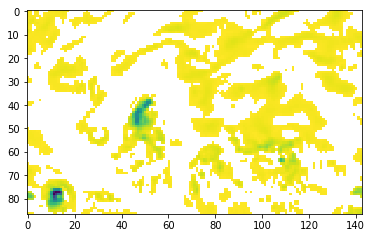

In [30]:
plt.imshow(oomega)

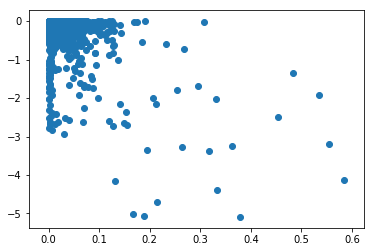

In [31]:
plt.scatter(iice,oomega)

In [75]:
rainplot =  rain['lsRain'][15,44,:]*3600
omplot = omega['omega_pl'][4,2,44,:]

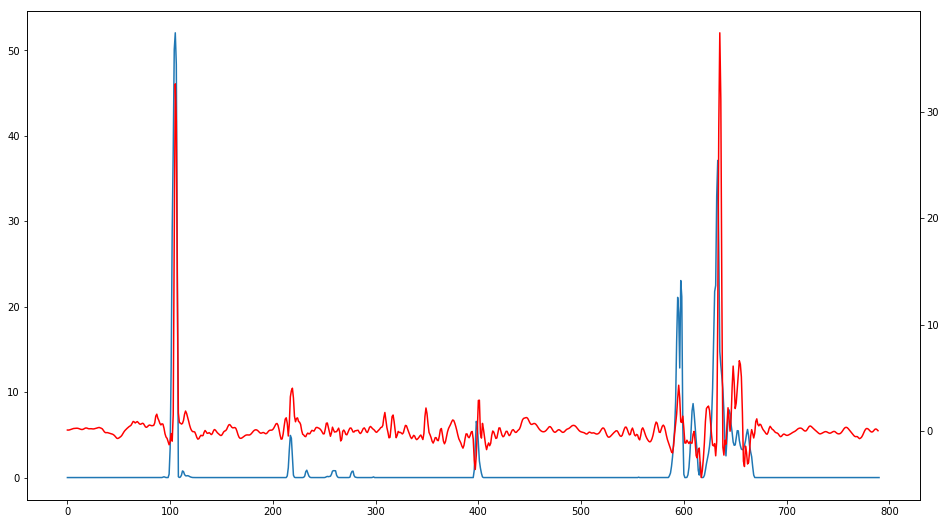

In [80]:
f=plt.figure()
ax = f.add_subplot(111)
ax.plot(rainplot)
ax1 = ax.twinx()
ax1.plot(omplot*-1, color='r')

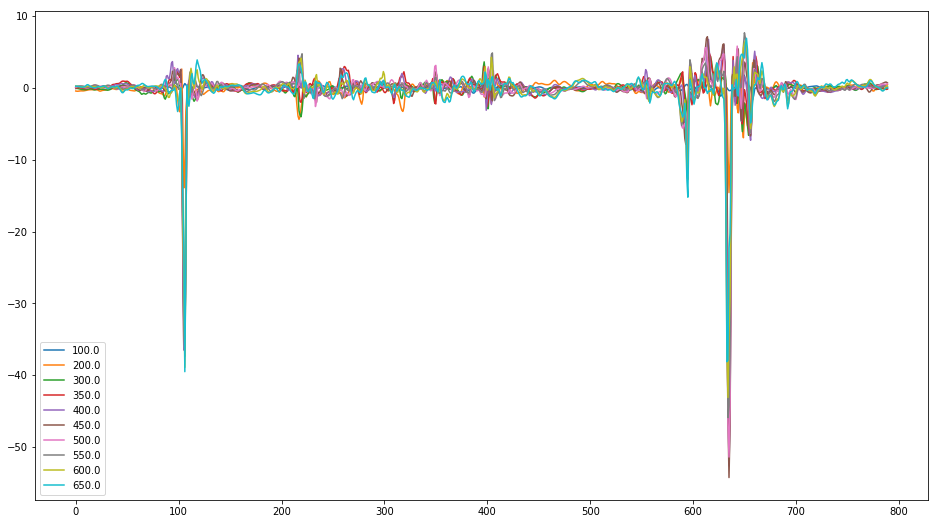

In [67]:
plt.figure()
for l in range(10):
    lab = omega.pressure.values[l]
    plt.plot(omega['omega_pl'][4,l,44,:], label=str(lab))
    
plt.legend()    
plt.show()